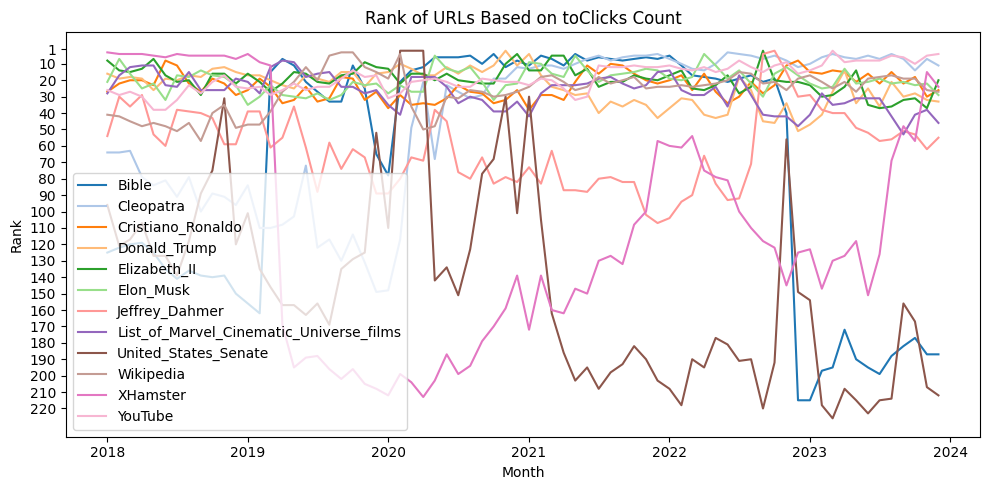

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

numOfDataPoints = 12

df = pd.read_csv('popularity_with_month.tsv', sep='\t')

df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

total_clicks = df.groupby('url')['toClicks'].sum()

df['rank'] = df.groupby('month')['toClicks'].rank(ascending=False).astype(int)

top_10_urls = total_clicks.nlargest(numOfDataPoints + 2).index

df_top_10 = df[df['url'].isin(top_10_urls)]

pivot_df = df_top_10.pivot_table(index='month', columns='url', values='rank', aggfunc='first')

pivot_df.reset_index(inplace=True)
pivot_df.columns.name = None

plt.figure(figsize=(10, 5))

cmap = plt.get_cmap('tab20')  

for i, url in enumerate(pivot_df.columns[1:]):
    if url == 'Hyphen-minus' or url == 'Main_Page':
        continue

    color = cmap(i % 20)
    plt.plot(pivot_df['month'], pivot_df[url], label=url, color=color)
    
plt.gca().invert_yaxis()
plt.yticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220])

plt.xlabel('Month')
plt.ylabel('Rank')
plt.title('Rank of URLs Based on toClicks Count')
plt.legend(loc='lower left')

plt.tight_layout()

plt.savefig('output_lineplot.svg')

plt.show()
